In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dg = xr.open_dataset('/mnt/c/Users/z5392640/OneDrive - UNSW/Documents/PhD/scientific_topics/heat_budget/neil_nci/colette/outer_avg.nc')
dg

<xarray.Dataset>
Dimensions:         (tracer: 2, boundary: 4, s_rho: 30, s_w: 31, eta_rho: 317,
                     xi_rho: 272, eta_u: 317, xi_u: 271, eta_v: 316, xi_v: 272,
                     eta_psi: 316, xi_psi: 271, ocean_time: 30)
Coordinates:
  * s_rho           (s_rho) float64 -0.9715 -0.9156 ... -0.0156 -0.004799
  * s_w             (s_w) float64 -1.0 -0.9433 -0.8883 ... -0.02161 -0.01 0.0
    lon_rho         (eta_rho, xi_rho) float64 ...
    lat_rho         (eta_rho, xi_rho) float64 ...
    lon_u           (eta_u, xi_u) float64 ...
    lat_u           (eta_u, xi_u) float64 ...
    lon_v           (eta_v, xi_v) float64 ...
    lat_v           (eta_v, xi_v) float64 ...
    lon_psi         (eta_psi, xi_psi) float64 ...
    lat_psi         (eta_psi, xi_psi) float64 ...
  * ocean_time      (ocean_time) datetime64[ns] 1994-02-01 ... 1994-03-02
Dimensions without coordinates: tracer, boundary, eta_rho, xi_rho, eta_u, xi_u,
                                eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/128)
    ntimes          int32 ...
    ndtfast         int32 ...
    dt              float64 ...
    dtfast          float64 ...
    dstart          datetime64[ns] ...
    nHIS            int32 ...
    ...              ...
    rain            (ocean_time, eta_rho, xi_rho) float32 ...
    swrad           (ocean_time, eta_rho, xi_rho) float32 ...
    sustr           (ocean_time, eta_u, xi_u) float32 ...
    svstr           (ocean_time, eta_v, xi_v) float32 ...
    bustr           (ocean_time, eta_u, xi_u) float32 ...
    bvstr           (ocean_time, eta_v, xi_v) float32 ...
Attributes: (12/34)
    file:              outer_avg.nc
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS nonlinear model averages file
    title:             EAC OUTER GRID
    var_info:          varinfo.dat
    ...                ...
    compiler_command:  /apps/openmpi/4.0.2/bin/mpif90
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            006x008
    history:           ROMS/TOMS, Version 3.9, Thursday - November 23, 2023 -...
    ana_file:          ROMS/Functionals/ana_btflux.h
    CPP_options:       EAC, ADD_FSOBC, ADD_M2OBC, ANA_BSFLUX, ANA_BTFLUX, ASS...

In [3]:
# # Selecting a small area
xi_slice = slice(60, 160)
eta_slice = slice(0, 50)

# xi_slice = slice(0, -1)
# eta_slice = slice(0, -1)

lat_rho = dg["lat_rho"].isel(eta_rho=eta_slice, xi_rho=xi_slice)
lon_rho = dg["lon_rho"].isel(eta_rho=eta_slice, xi_rho=xi_slice)
lat_u = dg["lat_u"].isel(eta_u=eta_slice, xi_u=xi_slice)
lon_u = dg["lon_u"].isel(eta_u=eta_slice, xi_u=xi_slice)
lat_v = dg["lat_v"].isel(eta_v=eta_slice, xi_v=xi_slice)
lon_v = dg["lon_v"].isel(eta_v=eta_slice, xi_v=xi_slice)
pm = dg["pm"].isel(eta_rho=eta_slice, xi_rho=xi_slice)
pn = dg["pn"].isel(eta_rho=eta_slice, xi_rho=xi_slice)
h = dg["h"].isel(eta_rho=eta_slice, xi_rho=xi_slice)

area=np.divide(1,pm*pn)

In [4]:
# Getting the values where we have nan to use as mask
land_mask = np.isnan(dg.temp.isel(ocean_time=0, s_rho=-1, eta_rho=eta_slice, xi_rho=xi_slice))

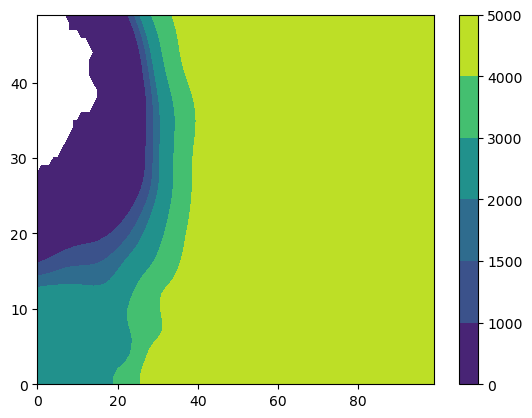

In [5]:
# Using the mask
# dg.temp.isel(ocean_time=0, s_rho=-1).where(~land_mask).where(h <= 200).isel(eta_rho=slice(30, -50), xi_rho=slice(30, -170)).plot(y='lat_rho', x='lon_rho')
h = h.where(~land_mask)
plt.contourf(h, levels=[0, 1000, 1500, 2000, 3000, 4000, 5000])
plt.colorbar()

In [6]:
# Fill in land with zeros:
h = h.fillna(0)
# h.where(h<=200).plot()


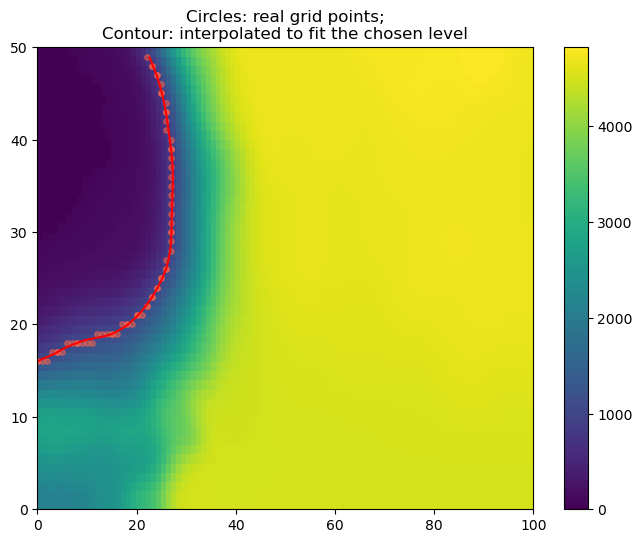

In [7]:
# Contours and grid does not perfectly match because the contour can be anything, and so, it is interpolated.
contour_depth = 1000.

x_var = lon_rho
y_var = lat_rho

fig = plt.figure(figsize = (8, 6))
# count = 165 # contour 87 for 2000m isobath, 165 for 1500m
x_contour = []
y_contour = []

# Create the contour:
sc = plt.contour(h, levels=[contour_depth], colors='red')
plt.contourf(h, levels=[0, 1000, 1500, 2000, 3000, 4000, 5000])
plt.pcolor(h)
plt.colorbar()
for collection in sc.collections:
    for path in collection.get_paths():
        # print(collection.get_paths())

        # count += 1
        # if count ==  212:
        # Write down the lat/lon indices
        for ii in range(np.size(path.vertices[:,0])):
            if int(np.round(path.vertices[ii][0])) < 125:   #FS added to select only the shelf break contour
                x_contour.append(int(np.round(path.vertices[ii][0])))
                y_contour.append(int(np.round(path.vertices[ii][1])))

plt.scatter(x_contour, y_contour, s=15, alpha=0.5, color='tomato');
plt.title('Circles: real grid points;\nContour: interpolated to fit the chosen level');

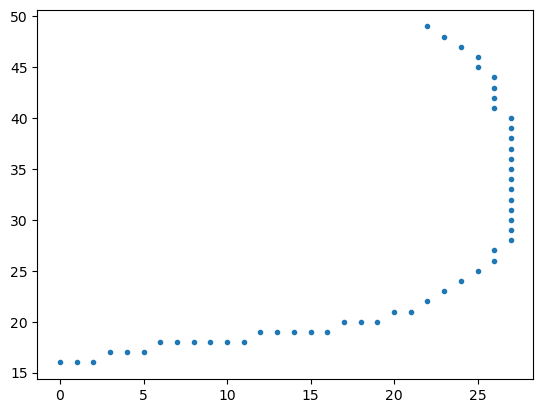

In [81]:
plt.plot(x_contour, y_contour, '.');


In [9]:
# Difference between two neighbouring indices
diff_x_contour = np.diff(x_contour)
diff_y_contour = np.diff(y_contour)


In [10]:
x_contour, y_contour

([22,
  23,
  23,
  24,
  24,
  25,
  25,
  25,
  26,
  26,
  26,
  26,
  26,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  26,
  26,
  26,
  25,
  25,
  24,
  24,
  23,
  23,
  22,
  22,
  21,
  20,
  20,
  19,
  18,
  18,
  17,
  16,
  15,
  15,
  14,
  13,
  12,
  11,
  10,
  9,
  8,
  8,
  7,
  6,
  5,
  4,
  4,
  3,
  2,
  1,
  0,
  0],
 [49,
  48,
  48,
  47,
  47,
  46,
  45,
  45,
  44,
  43,
  43,
  42,
  41,
  40,
  39,
  39,
  38,
  37,
  36,
  35,
  34,
  33,
  32,
  31,
  30,
  30,
  29,
  28,
  27,
  26,
  26,
  25,
  25,
  24,
  24,
  23,
  23,
  22,
  22,
  21,
  21,
  21,
  20,
  20,
  20,
  20,
  19,
  19,
  19,
  19,
  19,
  19,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  17,
  17,
  17,
  17,
  16,
  16,
  16,
  16])

In [11]:
diff_x_contour, diff_y_contour

(array([ 1,  0,  1,  0,  1,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0, -1,  0,
        -1,  0, -1,  0, -1, -1,  0, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1,
        -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0]),
 array([-1,  0, -1,  0, -1, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1,
        -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0, -1,  0,
        -1,  0, -1,  0, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0]))

In [12]:
# Get a list with the indices of duplicates
diff_ind = []
for ii in range(len(diff_x_contour)):
    if (diff_x_contour[ii]==0) and (diff_y_contour[ii]==0):
        diff_ind.append(ii)


In [13]:
#if both diff_y_contour and diff_x_contour == 0, means duplicate point
diff_ind

[1, 3, 6, 9, 14, 24, 29, 31, 33, 35, 37, 40, 43, 47, 55, 60, 65]

In [14]:
# Now remove the indices (start from the end so the indices don't shift)
for ii in range(len(diff_ind)):
    index = diff_ind[::-1][ii]
    del x_contour[index]
    del y_contour[index]

In [15]:
x_contour, y_contour

([22,
  23,
  24,
  25,
  25,
  26,
  26,
  26,
  26,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  26,
  26,
  25,
  24,
  23,
  22,
  21,
  20,
  19,
  18,
  17,
  16,
  15,
  14,
  13,
  12,
  11,
  10,
  9,
  8,
  7,
  6,
  5,
  4,
  3,
  2,
  1,
  0],
 [49,
  48,
  47,
  46,
  45,
  44,
  43,
  42,
  41,
  40,
  39,
  38,
  37,
  36,
  35,
  34,
  33,
  32,
  31,
  30,
  29,
  28,
  27,
  26,
  25,
  24,
  23,
  22,
  21,
  21,
  20,
  20,
  20,
  19,
  19,
  19,
  19,
  19,
  18,
  18,
  18,
  18,
  18,
  18,
  17,
  17,
  17,
  16,
  16,
  16])

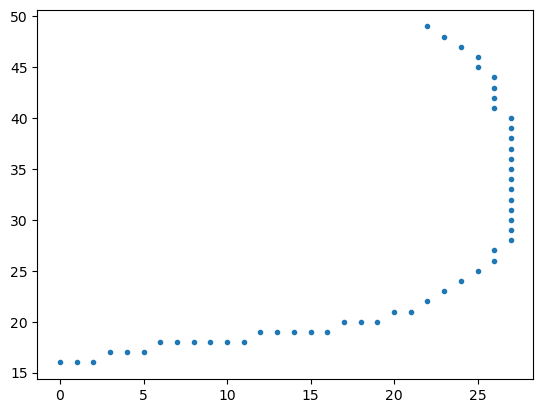

In [88]:
plt.plot(x_contour, y_contour, '.');

In [17]:
# Getting the bathymetry for the contour
h_contour = np.zeros(len(x_contour))

for ii in range(len(h_contour)):
    h_contour[ii] = h[y_contour[ii], x_contour[ii]]

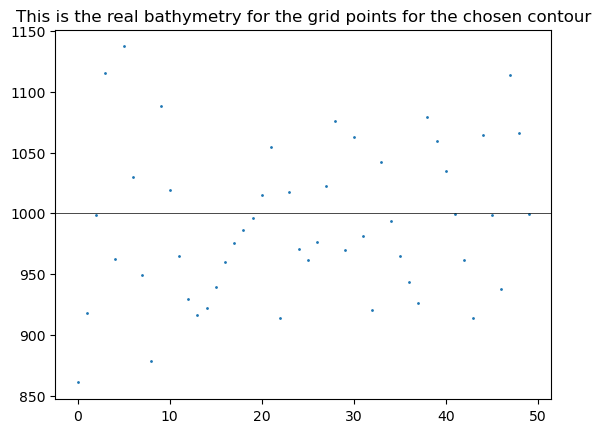

In [18]:
plt.plot(h_contour, 'o', markersize=1)
plt.axhline(contour_depth, color='k', linewidth=0.5);
plt.title('This is the real bathymetry for the grid points for the chosen contour');

In [19]:
# Choose whether you want your contour on the u or t grid.
x_var = lon_rho
y_var = lat_rho

x_var, y_var


(<xarray.DataArray 'lon_rho' (eta_rho: 50, xi_rho: 100)>
 [5000 values with dtype=float64]
 Coordinates:
     lon_rho  (eta_rho, xi_rho) float64 ...
     lat_rho  (eta_rho, xi_rho) float64 ...
 Dimensions without coordinates: eta_rho, xi_rho
 Attributes:
     long_name:      longitude of RHO-points
     units:          degree_east
     standard_name:  longitude
     field:          lon_rho, scalar,
 <xarray.DataArray 'lat_rho' (eta_rho: 50, xi_rho: 100)>
 [5000 values with dtype=float64]
 Coordinates:
     lon_rho  (eta_rho, xi_rho) float64 ...
     lat_rho  (eta_rho, xi_rho) float64 ...
 Dimensions without coordinates: eta_rho, xi_rho
 Attributes:
     long_name:      latitude of RHO-points
     units:          degree_north
     standard_name:  latitude
     field:          lat_rho, scalar)

In [20]:
# Getting lat and lon from the indexes
lat_along_contour = np.zeros((len(x_contour)))
lon_along_contour = np.zeros((len(x_contour)))

# FS why do we need -1 here???
for ii in range(len(h_contour)):
    # print(ii-1)
    # lon_along_contour[ii] = x_var[y_contour[ii-1],x_contour[ii-1]]
    # lat_along_contour[ii] = y_var[y_contour[ii-1],x_contour[ii-1]]
    lon_along_contour[ii] = x_var[y_contour[ii],x_contour[ii]]
    lat_along_contour[ii] = y_var[y_contour[ii],x_contour[ii]]    

In [21]:
lon_along_contour, lat_along_contour 

(array([150.36832699, 150.37701783, 150.3857334 , 150.39447379,
        150.37662   , 150.38539258, 150.36753835, 150.3496764 ,
        150.33180669, 150.34062643, 150.32275636, 150.30487852,
        150.28699292, 150.26909951, 150.2511983 , 150.23328927,
        150.2153724 , 150.19744766, 150.17951506, 150.16157457,
        150.14362617, 150.12566985, 150.0808087 , 150.0628209 ,
        150.01789984, 149.97294231, 149.92794822, 149.88291747,
        149.83784995, 149.81087623, 149.76575898, 149.73877524,
        149.71179438, 149.66661435, 149.63962346, 149.61263544,
        149.58565028, 149.558668  , 149.51339923, 149.48640692,
        149.45941748, 149.4324309 , 149.4054472 , 149.37846636,
        149.33309576, 149.3061049 , 149.27911691, 149.23368297,
        149.20668494, 149.17968979]),
 array([-37.10043813, -37.15049403, -37.20054993, -37.25060584,
        -37.29295485, -37.34301075, -37.38535976, -37.42770878,
        -37.47005779, -37.52011369, -37.5624627 , -37.60481172,
  

In [22]:
# FS: My method. I think it is safer because I am informing the dimensions to be used, instead of selection columns...
lat_along_contour = list()
lon_along_contour = list()
for xx, yy in zip(x_contour, y_contour):
    lon_along_contour.append(x_var.isel(xi_rho=xx, eta_rho=yy).values)
    lat_along_contour.append(y_var.isel(xi_rho=xx, eta_rho=yy).values)


lon_along_contour, lat_along_contour

([array(150.36832699),
  array(150.37701783),
  array(150.3857334),
  array(150.39447379),
  array(150.37662),
  array(150.38539258),
  array(150.36753835),
  array(150.3496764),
  array(150.33180669),
  array(150.34062643),
  array(150.32275636),
  array(150.30487852),
  array(150.28699292),
  array(150.26909951),
  array(150.2511983),
  array(150.23328927),
  array(150.2153724),
  array(150.19744766),
  array(150.17951506),
  array(150.16157457),
  array(150.14362617),
  array(150.12566985),
  array(150.0808087),
  array(150.0628209),
  array(150.01789984),
  array(149.97294231),
  array(149.92794822),
  array(149.88291747),
  array(149.83784995),
  array(149.81087623),
  array(149.76575898),
  array(149.73877524),
  array(149.71179438),
  array(149.66661435),
  array(149.63962346),
  array(149.61263544),
  array(149.58565028),
  array(149.558668),
  array(149.51339923),
  array(149.48640692),
  array(149.45941748),
  array(149.4324309),
  array(149.4054472),
  array(149.37846636),
 

In [23]:
# Repeat the leftmost point at the end of the array.
# (Required for masking contour above and below)
# FS: is this the same approach for my contour orientation??
lat_along_contour = np.append(lat_along_contour, lat_along_contour[0])
lon_along_contour = np.append(lon_along_contour, lon_along_contour[0])

In [24]:
lat_along_contour

array([-37.10043813, -37.15049403, -37.20054993, -37.25060584,
       -37.29295485, -37.34301075, -37.38535976, -37.42770878,
       -37.47005779, -37.52011369, -37.5624627 , -37.60481172,
       -37.64716073, -37.68950974, -37.73185875, -37.77420776,
       -37.81655678, -37.85890579, -37.9012548 , -37.94360381,
       -37.98595283, -38.02830184, -38.06294396, -38.10529297,
       -38.1399351 , -38.17457722, -38.20921934, -38.24386146,
       -38.27850358, -38.27079669, -38.30543882, -38.29773193,
       -38.29002504, -38.32466716, -38.31696027, -38.30925338,
       -38.30154649, -38.2938396 , -38.32848172, -38.32077483,
       -38.31306794, -38.30536105, -38.29765416, -38.28994727,
       -38.32458939, -38.3168825 , -38.30917561, -38.34381774,
       -38.33611085, -38.32840396, -37.10043813])

In [25]:
# Number of grid points on the contour
num_points = len(lat_along_contour)

# Now we number the points along the contour
contour_mask_numbered = np.zeros_like(lon_along_contour)

for ii in range(num_points-1):
    lat1 = lat_along_contour[ii]
    lat2 = lat_along_contour[ii+1]
    lon1 = lon_along_contour[ii]
    lon2 = lon_along_contour[ii+1]
    contour_mask_numbered[ii] = ii

contour_mask = h*0

for ii in range(num_points-1):
    contour_mask[y_contour[ii], x_contour[ii]] = contour_mask_numbered[ii]+1

contour_mask_numbered = contour_mask

In [26]:
contour_mask_numbered[0], contour_mask_numbered[-2]

(<xarray.DataArray 'h' (xi_rho: 100)>
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
 Coordinates:
     lon_rho     (xi_rho) float64 148.9 148.9 148.9 149.0 ... 151.7 151.8 151.8
     lat_rho     (xi_rho) float64 -39.01 -39.01 -39.02 ... -39.81 -39.82 -39.83
     s_rho       float64 -0.004799
     ocean_time  datetime64[ns] 1994-02-01
 Dimensions without coordinates: xi_rho,
 <xarray.DataArray 'h' (xi_rho: 100)>
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.

Text(0.5, 1.0, 'Contour numbered')

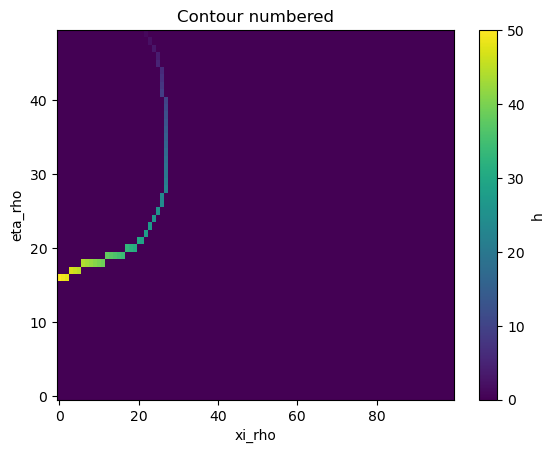

In [27]:
contour_mask_numbered.plot()
plt.title('Contour numbered')

Text(0.5, 1.0, 'Position to start masking')

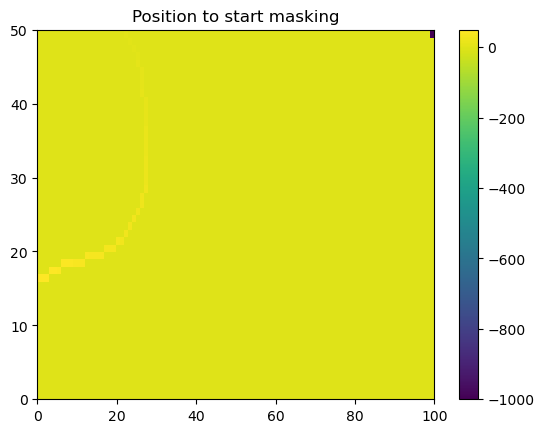

In [28]:
# FS to see what happens here
mask_value = -1000
contour_masked_above = np.copy(contour_mask_numbered)
contour_masked_above[-1, -1] = mask_value

plt.pcolor(contour_masked_above)
plt.colorbar()
plt.title('Position to start masking')

In [29]:
#Create mask
# fill in one cell to the top east of the contour with value mask_value:I want offshore waters to be == -1000 and landward to be == 0
contour_masked_above = np.copy(contour_mask_numbered)
contour_masked_above[-1, -1] = mask_value

# The next loops will check the masks numbers (-1000 or 0) starting from
# the four corners of the domain. The one that will actually do all the work
# for my domain (FS speaking) is the first, "from top left" 

# from top left:
for ii in range(len(contour_mask[0,:])-1): #x: len(x-axis) - 1
    for jj in range(len(contour_mask[:, 0]))[::-1][:-1]: #y: len(y-axis)[from end to start, inverse order][from first to (end-1)]
        if contour_masked_above[jj, ii] == mask_value: # if west of contour line
            if contour_masked_above[jj-1, ii] == 0: # if previous cell in Y-dir is zero (= south of contour line)
                contour_masked_above[jj-1, ii] = mask_value # make it -1000
            if contour_masked_above[jj, ii+1] == 0: # if next cell in X-dir is zero
                contour_masked_above[jj, ii+1] = mask_value # make it -1000

#from top right:
for ii in range(len(contour_mask[0,:]))[::-1][:-1]:
    for jj in range(len(contour_mask[:,0]))[::-1][:-1]:
        if contour_masked_above[jj, ii] == mask_value:
            if contour_masked_above[jj-1, ii] == 0: # if previous cell in Y-dir is zero
                contour_masked_above[jj-1, ii] = mask_value
            if contour_masked_above[jj, ii-1] == 0: # if previous cell in X-dir is zero
                contour_masked_above[jj, ii-1] = mask_value

# from bottom right:
for ii in range(len(contour_mask[0,:]))[::-1][:-1]:
    for jj in range(len(contour_mask[:,0])-1):
        if contour_masked_above[jj, ii] == mask_value:
            if contour_masked_above[jj+1, ii] == 0: # if next cell in Y-dir is zero
                contour_masked_above[jj+1, ii] = mask_value
            if contour_masked_above[jj, ii-1] == 0: # if previous cell in X-dir is zero
                contour_masked_above[jj, ii-1] = mask_value

#from bottom left
for ii in range(len(contour_mask[0,:])-1):
    for jj in range(len(contour_mask[:,0])-1):
        if contour_masked_above[jj, ii] == mask_value:
            if contour_masked_above[jj+1, ii] == 0: # if next cell in Y-dir is zero
                contour_masked_above[jj+1, ii] = mask_value
            if contour_masked_above[jj, ii+1] == 0: # if next cell in X-dir is zero
                contour_masked_above[jj, ii+1] = mask_value

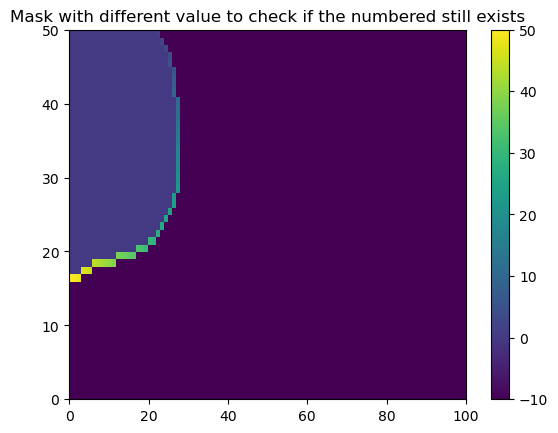

In [30]:
# FS just changing the filling value to check the numbered contour...created a temporary variable for that
contour_masked_above_tmp = np.where(contour_masked_above !=-1000, contour_masked_above, -10)
plt.pcolor(contour_masked_above_tmp)
plt.colorbar()
plt.title('Mask with different value to check if the numbered still exists');

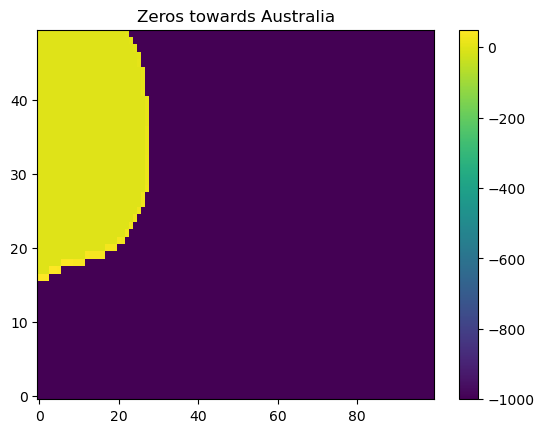

In [31]:
#FS and this is the original. Zeroes are towards Australia
plt.pcolormesh(contour_mask.xi_rho, contour_mask.eta_rho, contour_masked_above)
plt.colorbar();
plt.title('Zeros towards Australia');

In [32]:
# make halos: add 2 extra rows with the value of the last/first columns of the original
# The halo matrix has to be created according with your domain orientation.
shape = contour_masked_above.shape
contour_masked_above_halo = np.zeros((shape[0], shape[1]+2))
contour_masked_above_halo[:, 0] = contour_masked_above[:, 0]  # Inverted this one
contour_masked_above_halo[:, 1:-1] = contour_masked_above
contour_masked_above_halo[:, -1] = contour_masked_above[:, -1] # with this one!

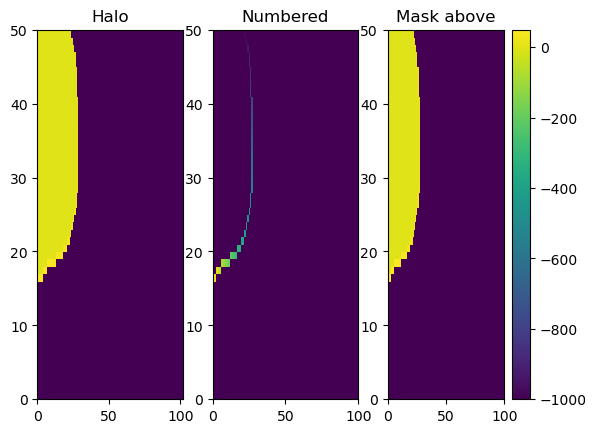

In [33]:
fig, ax = plt.subplots(ncols=3)
ax[0].pcolor(contour_masked_above_halo); ax[0].set_title('Halo');
ax[1].pcolor(contour_mask_numbered); ax[1].set_title('Numbered');
pc = ax[2].pcolor(contour_masked_above); plt.colorbar(pc)
ax[2].set_title('Mask above');

In [34]:
# # FS: contour_mask_numbered is treated as the original matrix (shape speaking)
# # contour_mask_numbered: 1 is at the top and 10 at the bottom -> for my test case

# new_number_count = 1
# for mask_loc in range(1, int(np.max(contour_mask_numbered))+1):   # FS> for my test case, range(1, 11)
#     print(mask_loc)

#     # FS: finding in the numbered matrix where is located the contour to be used and
#     # defined with a number from 1 to 10 in my test case.
#     index_i = np.where(contour_mask_numbered==mask_loc)[1]
#     index_j = np.where(contour_mask_numbered==mask_loc)[0]

#     # if point above is towards Antarctica and point below is away from Antarctica:
#     # take transport grid point to north of t grid:
#     if (contour_masked_above[index_j, index_i]==0) and (contour_masked_above[index_j-1, index_i]!=0):
#         mask_y_transport[index_j, index_i] = -1
#         # important to do
#         mask_y_transport_numbered[index_j, index_i] = new_number_count
#         new_number_count += 1
#     # if point below is towards Antarctica and point above is away from Antarctica:
#     # take transport grid point to south of t grid:
#     elif (contour_masked_above[index_j-1, index_i]==0) and (contour_masked_above[index_j+1, index_i]!=0):
#         mask_y_transport[index_j-1, index_i] = 1
#         mask_y_transport_numbered[index_j-1, index_i] = new_number_count
#         new_number_count += 1


#     # if point to right is towards Antarctica and point to left is away from Antarctica:
#     # zonal indices increased by 1 due to halos
#     # take transport grid point on right of t grid:
#     if (contour_masked_above_halo[index_j, index_i+2]==0) and (contour_masked_above_halo[index_j, index_i]!=0):
#         mask_x_transport[index_j, index_i] = -1
#         mask_x_transport_numbered[index_j, index_i] = new_number_count
#         new_number_count += 1
#     # if point to left is towards Antarctica and point to right is away from Antarctica:
#     # take transport grid point on left of t grid:
#     elif (contour_masked_above_halo[index_j, index_i]==0) and (contour_masked_above_halo[index_j, index_i+2]!=0):
#         mask_x_transport[index_j, index_i-1] = 1
#         mask_x_transport_numbered[index_j, index_i-1] = new_number_count
#         new_number_count += 1


In [35]:
new_number_count = 1
for mask_loc in range(1, int(np.max(contour_mask_numbered))+1):
    index_i = np.where(contour_mask_numbered==mask_loc)[1]
    index_j = np.where(contour_mask_numbered==mask_loc)[0]
    print(mask_loc, index_j, index_i)

1 [49] [22]
2 [48] [23]
3 [47] [24]
4 [46] [25]
5 [45] [25]
6 [44] [26]
7 [43] [26]
8 [42] [26]
9 [41] [26]
10 [40] [27]
11 [39] [27]
12 [38] [27]
13 [37] [27]
14 [36] [27]
15 [35] [27]
16 [34] [27]
17 [33] [27]
18 [32] [27]
19 [31] [27]
20 [30] [27]
21 [29] [27]
22 [28] [27]
23 [27] [26]
24 [26] [26]
25 [25] [25]
26 [24] [24]
27 [23] [23]
28 [22] [22]
29 [21] [21]
30 [21] [20]
31 [20] [19]
32 [20] [18]
33 [20] [17]
34 [19] [16]
35 [19] [15]
36 [19] [14]
37 [19] [13]
38 [19] [12]
39 [18] [11]
40 [18] [10]
41 [18] [9]
42 [18] [8]
43 [18] [7]
44 [18] [6]
45 [17] [5]
46 [17] [4]
47 [17] [3]
48 [16] [2]
49 [16] [1]
50 [16] [0]


In [36]:
# make halos: add 2 extra rows with the value of the last/first columns of the original
shape = contour_masked_above.shape
contour_masked_above_halo = np.zeros((shape[0]+2, shape[1]))
# FS: is this line the opposite? I think it has to be to avoid same numbered to be reconized
contour_masked_above_halo[0, :] = contour_masked_above[-1, :]  
contour_masked_above_halo[1:-1, :] = contour_masked_above
# FS: is this line the opposite?
contour_masked_above_halo[-1, :] = contour_masked_above[0, :] 


import numpy.ma as ma

# Direction of cross-contour transport
mask_x_transport = np.zeros_like(contour_mask_numbered)
mask_y_transport = np.zeros_like(contour_mask_numbered)

mask_y_transport_numbered = np.zeros_like(contour_mask_numbered)
mask_x_transport_numbered = np.zeros_like(contour_mask_numbered)


new_number_count = 1
for mask_loc in range(1, int(np.max(contour_mask_numbered))+1):
    index_i = np.where(contour_mask_numbered==mask_loc)[1]
    index_j = np.where(contour_mask_numbered==mask_loc)[0]
    
    
    # if point above is towards Antarctica and point below is away from Antarctica:
    # take transport grid point to north of t grid:
    if (contour_masked_above[index_j, index_i+1]==0) and (contour_masked_above[index_j, index_i-1]!=0):
        mask_x_transport[index_j, index_i] = -1
        # important to do 
        mask_x_transport_numbered[index_j, index_i] = new_number_count
        new_number_count += 1
    
    
    # if point below is towards Antarctica and point above is away from Antarctica:
    # take transport grid point to south of t grid:
    elif (contour_masked_above[index_j, index_i-1]==0) and (contour_masked_above[index_j, index_i+1]!=0):
        mask_x_transport[index_j, index_i-1] = 1
        mask_x_transport_numbered[index_j, index_i-1] = new_number_count
        new_number_count += 1
    
    
    # # if point below and point above are BOTH towards Antarctica:
    # # take transport grid point to south of t grid:
    # elif (contour_masked_above[index_j, index_i-1]==0) and (contour_masked_above[index_j, index_i+1]==0):
    #     mask_x_transport[index_j, index_i-1] = 1
    #     mask_x_transport[index_j, index_i] = -1        
    #     mask_x_transport_numbered[index_j, index_i-1] = new_number_count
    #     mask_x_transport_numbered[index_j, index_i] = new_number_count+1
    #     new_number_count += 2
    
    
    # if point to right is towards Antarctica and point to left is away from Antarctica:
    # zonal indices increased by 1 due to halos
    # take transport grid point on right of t grid:
    if (contour_masked_above_halo[index_j+2, index_i]==0) and (contour_masked_above_halo[index_j, index_i]!=0):
        mask_y_transport[index_j, index_i] = -1
        mask_y_transport_numbered[index_j, index_i] = new_number_count
        new_number_count += 1
    # if point to left is towards Antarctica and point to right is away from Antarctica:
    # take transport grid point on left of t grid:
    elif (contour_masked_above_halo[index_j, index_i]==0) and (contour_masked_above_halo[index_j+2, index_i]!=0):
        mask_y_transport[index_j-1, index_i] = 1
        mask_y_transport_numbered[index_j, index_i-1] = new_number_count
        new_number_count += 1

    # # if point to left and right BOTH toward Antarctica
    # elif (contour_masked_above_halo[index_j, index_i]==0) and (contour_masked_above_halo[index_j+2, index_i]==0):
    #     mask_y_transport[index_j-1, index_i] = 1
    #     mask_y_transport[index_j, index_i] = -1        
    #     mask_y_transport_numbered[index_j-1, index_i] = new_number_count
    #     mask_y_transport_numbered[index_j, index_i] = new_number_count+1
    #     new_number_count += 2

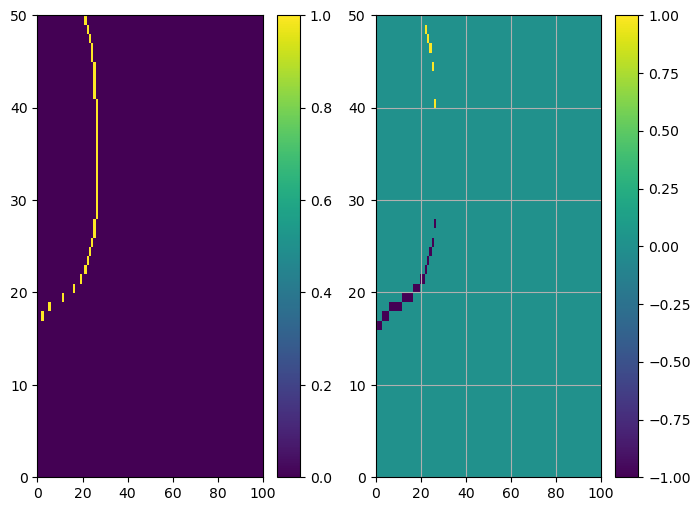

In [37]:
fig, ax = plt.subplots(ncols=2, figsize=(8,6))
ax0 = ax[0].pcolor(mask_x_transport);plt.colorbar(ax0); 
ax1 = ax[1].pcolor(mask_y_transport); plt.colorbar(ax1); plt.grid(True)

In [38]:
# # TO TEST...will plot every contour found per row

# # make halos: add 2 extra rwos with the value of the last/first columns of the original
# shape = contour_masked_above.shape
# contour_masked_above_halo = np.zeros((shape[0]+2, shape[1]))
# contour_masked_above_halo[0, :] = contour_masked_above[-1, :]  # FS: is this line the opposite? I think it has to be to avoid same numbered to be reconized
# contour_masked_above_halo[1:-1, :] = contour_masked_above
# contour_masked_above_halo[-1, :] = contour_masked_above[0, :] # FS: is this line the opposite?


# import numpy.ma as ma

# # Direction of cross-contour transport
# mask_x_transport = np.zeros_like(contour_mask_numbered)
# mask_y_transport = np.zeros_like(contour_mask_numbered)

# mask_y_transport_numbered = np.zeros_like(contour_mask_numbered)
# mask_x_transport_numbered = np.zeros_like(contour_mask_numbered)


# new_number_count = 1
# for mask_loc in range(1, int(np.max(contour_mask_numbered))+1):
#     index_i = np.where(contour_mask_numbered==mask_loc)[1]
#     index_j = np.where(contour_mask_numbered==mask_loc)[0]


#     print(mask_loc, index_i, index_j)
#     print(contour_masked_above_halo[index_j, index_i])
#     # print((contour_masked_above_halo[index_j+2, index_i]==0) and (contour_masked_above_halo[index_j, index_i]!=0))
#     # print((contour_masked_above_halo[index_j, index_i]==0) and (contour_masked_above_halo[index_j+2, index_i]!=0))
#     # print((contour_masked_above_halo[index_j, index_i]==0) and (contour_masked_above_halo[index_j+2, index_i]==0))
#     # if point to right is towards Antarctica and point to left is away from Antarctica:
#     # zonal indices increased by 1 due to halos
#     # take transport grid point on right of t grid:
#     if (contour_masked_above_halo[index_j+2, index_i]==0) and (contour_masked_above_halo[index_j, index_i]!=0):
#         print('yeah = 1')
#         mask_y_transport[index_j, index_i] = -1
#         mask_y_transport_numbered[index_j, index_i] = new_number_count
#         new_number_count += 1
#     # if point to left is towards Antarctica and point to right is away from Antarctica:
#     # take transport grid point on left of t grid:
#     elif (contour_masked_above_halo[index_j, index_i]==0) and (contour_masked_above_halo[index_j+2, index_i]!=0):
#         print('yeah = 2')
#         mask_y_transport[index_j-1, index_i] = 1
#         mask_y_transport_numbered[index_j, index_i-1] = new_number_count
#         new_number_count += 1
#     # if point to left and right BOTH toward Antarctica
#     elif (contour_masked_above_halo[index_j, index_i]==0) and (contour_masked_above_halo[index_j+2, index_i]==0):
#         print('yeah = 3')
#         # mask_y_transport[index_j-1, index_i] = 1
#         mask_y_transport[index_j, index_i] = -1        
#         mask_y_transport_numbered[index_j-1, index_i] = new_number_count
#         mask_y_transport_numbered[index_j, index_i] = new_number_count+1
#         new_number_count += 2
    
#     fig, ax = plt.subplots()
#     plt.pcolor(mask_y_transport)
    

In [39]:
# # Fabio's version, with less if statements, but for my domain orientation.

# mask_x_transport = np.zeros_like(contour_mask_numbered)
# mask_y_transport = np.zeros_like(contour_mask_numbered)

# mask_y_transport_numbered = np.zeros_like(contour_mask_numbered)
# mask_x_transport_numbered = np.zeros_like(contour_mask_numbered)

# # make halos: add 2 extra columns with the value of the last/first columns of the original
# shape = contour_masked_above.shape
# contour_masked_above_halo = np.zeros((shape[0]+2, shape[1]))
# contour_masked_above_halo[0, :] = contour_masked_above[-1, :]
# contour_masked_above_halo[1:-1, :] = contour_masked_above
# contour_masked_above_halo[-1, :] = contour_masked_above[0, :]

# new_number_count = 1
# for mask_loc in range(1, int(np.max(contour_mask_numbered))+1):
#     index_i = np.where(contour_mask_numbered==mask_loc)[1]
#     index_j = np.where(contour_mask_numbered==mask_loc)[0]
#     # if point above is towards Antarctica and point below is away from Antarctica:
#     # take transport grid point to north of t grid:
#     if (contour_masked_above[index_j, index_i+1]==0) and (contour_masked_above[index_j, index_i-1]!=0):
#         mask_x_transport[index_j, index_i] = -1
#         # important to do 
#         mask_x_transport_numbered[index_j, index_i] = new_number_count
#         new_number_count += 1
#     # if point below is towards Antarctica and point above is away from Antarctica:
#     # take transport grid point to south of t grid:
#     elif (contour_masked_above[index_j, index_i-1]==0) and (contour_masked_above[index_j, index_i+1]!=0):
#         mask_x_transport[index_j, index_i-1] = 1
#         mask_x_transport_numbered[index_j, index_i-1] = new_number_count
#         new_number_count += 1

#     # if point to right is towards Antarctica and point to left is away from Antarctica:
#     # zonal indices increased by 1 due to halos
#     # take transport grid point on right of t grid:
#     if (contour_masked_above_halo[index_j+2, index_i]==0) and (contour_masked_above_halo[index_j, index_i]!=0):
#         mask_y_transport[index_j, index_i] = -1
#         mask_y_transport_numbered[index_j, index_i] = new_number_count
#         new_number_count += 1
#     # if point to left is towards Antarctica and point to right is away from Antarctica:
#     # take transport grid point on left of t grid:
#     elif (contour_masked_above_halo[index_j, index_i]==0) and (contour_masked_above_halo[index_j+2, index_i]!=0):
#         mask_y_transport[index_j-1, index_i] = 1
#         mask_y_transport_numbered[index_j-1, index_i] = new_number_count    
#         new_number_count += 1

In [40]:
# fig, ax = plt.subplots(ncols=2, figsize=(8,6))
# ax0 = ax[0].pcolor(mask_x_transport);plt.colorbar(ax0); 
# ax1 = ax[1].pcolor(mask_y_transport); plt.colorbar(ax1); plt.grid(True)

In [41]:
print(pm.shape, pn.shape)

(50, 100) (50, 100)


In [42]:
# This is Fabio's adaptation....not sure what it does....

import pyresample

rho_def = pyresample.geometry.SwathDefinition(lons=lon_rho,lats=lat_rho)
u_def = pyresample.geometry.SwathDefinition(lons=lon_u,lats=lat_u)
v_def = pyresample.geometry.SwathDefinition(lons=lon_v,lats=lat_v)


wf = lambda r: 1/r

mask_x_transport_Ugrd = pyresample.kd_tree.resample_custom(rho_def,mask_x_transport,u_def,\
                                            radius_of_influence=100000,neighbours=1,weight_funcs=wf)
mask_y_transport_Vgrd = pyresample.kd_tree.resample_custom(rho_def,mask_y_transport,v_def,\
                                            radius_of_influence=100000,neighbours=1,weight_funcs=wf)
mask_x_transport_numbered_Ugrd = pyresample.kd_tree.resample_custom(rho_def,mask_x_transport_numbered,u_def,\
                                            radius_of_influence=100000,neighbours=1,weight_funcs=wf)
mask_y_transport_numbered_Vgrd = pyresample.kd_tree.resample_custom(rho_def,mask_y_transport_numbered,v_def,\
                                            radius_of_influence=100000,neighbours=1,weight_funcs=wf)


In [43]:
# Convert contour masks to data arrays, so we can multiply them later.
# We need to ensure the lat lon coordinates correspond to the actual data location:
#       The y masks are used for ty_trans, so like vhrho this should have dimensions (yu_ocean, xt_ocean).
#       The x masks are used for tx_trans, so like uhrho this should have dimensions (yt_ocean, xu_ocean).
#       However the actual name will always be simply y_ocean/x_ocean irrespective of the variable
#       to make concatenation of transports in both direction and sorting possible.
coordinates=dict(one=lon_rho, two=lat_rho)
coordinatesU=dict(one=lon_u, two=lat_u)
coordinatesV=dict(one=lon_v, two=lat_v)


mask_x_transport_Ugrd = xr.DataArray(mask_x_transport_Ugrd, coords = coordinatesU, dims = ['eta_u', 'xi_u'])
mask_y_transport_Vgrd = xr.DataArray(mask_y_transport_Vgrd, coords = coordinatesV, dims = ['eta_v', 'xi_v'])
mask_x_transport_numbered_Ugrd = xr.DataArray(mask_x_transport_numbered_Ugrd, coords = coordinatesU, dims = ['eta_u', 'xi_u'])
mask_y_transport_numbered_Vgrd = xr.DataArray(mask_y_transport_numbered_Vgrd, coords = coordinatesV, dims = ['eta_v', 'xi_v'])

# rename dimensions as simply eta/xi
mask_x_transport_Ugrd = mask_x_transport_Ugrd.rename({'eta_u': 'eta','xi_u': 'xi'})
mask_y_transport_Vgrd = mask_y_transport_Vgrd.rename({'eta_v': 'eta','xi_v': 'xi'})
mask_x_transport_numbered_Ugrd = mask_x_transport_numbered_Ugrd.rename({'eta_u': 'eta','xi_u': 'xi'})
mask_y_transport_numbered_Vgrd = mask_y_transport_numbered_Vgrd.rename({'eta_v': 'eta','xi_v': 'xi'})

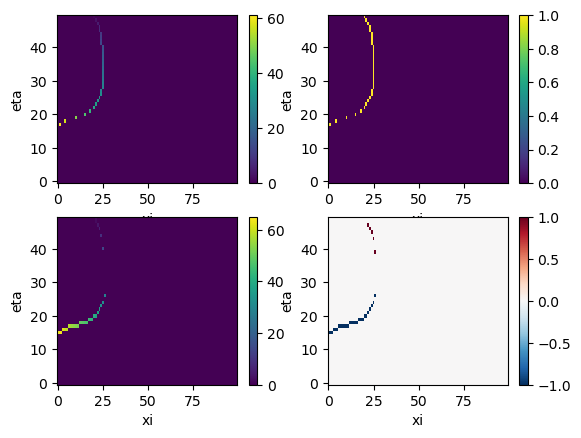

In [47]:
fig, ax = plt.subplots(nrows=2, ncols=2)
mask_x_transport_numbered_Ugrd.plot(ax=ax[0, 0])
mask_x_transport_Ugrd.plot(ax=ax[0, 1])
mask_y_transport_numbered_Vgrd.plot(ax=ax[1, 0])
mask_y_transport_Vgrd.plot(ax=ax[1, 1])

In [49]:
# Create the contour order data-array. Note that in this procedure the x-grid counts have x-grid
#   dimensions and the y-grid counts have y-grid dimensions, but these are implicit, the dimension
#   *names* are kept general across the counts, the generic y_ocean, x_ocean, so that concatening works
#   but we dont double up with numerous counts for one lat/lon point.

# stack contour data into 1d:
mask_x_numbered_1d = mask_x_transport_numbered_Ugrd.stack(contour_index = ['eta', 'xi'])
mask_x_numbered_1d = mask_x_numbered_1d.where(mask_x_numbered_1d > 0, drop = True)

mask_y_numbered_1d = mask_y_transport_numbered_Vgrd.stack(contour_index = ['eta', 'xi'])
mask_y_numbered_1d = mask_y_numbered_1d.where(mask_y_numbered_1d > 0, drop = True)

contour_ordering = xr.concat((mask_x_numbered_1d, mask_y_numbered_1d), dim = 'contour_index', data_vars="all")
contour_ordering = contour_ordering.sortby(contour_ordering)
contour_index_array = np.arange(1, len(contour_ordering)+1)

In [50]:
temp = dg.temp.isel(ocean_time=0)
v = dg.v_northward.isel(ocean_time=0)
u = dg.u_eastward.isel(ocean_time=0)


In [94]:
# determine constants:
rho0 = 1025 # kg. m-3
Cp = 3989.245 # J.kg-1.degC-1


# Bad calculation of heat transport, due to the use of rho points for temp!!!! FS
v_heat_trans = (temp * v * Cp * rho0).isel(eta_rho=eta_slice, xi_rho=xi_slice).rename({'eta_rho': 'eta','xi_rho': 'xi'})
u_heat_trans = (temp * u * Cp * rho0).isel(eta_rho=eta_slice, xi_rho=xi_slice).rename({'eta_rho': 'eta','xi_rho': 'xi'})





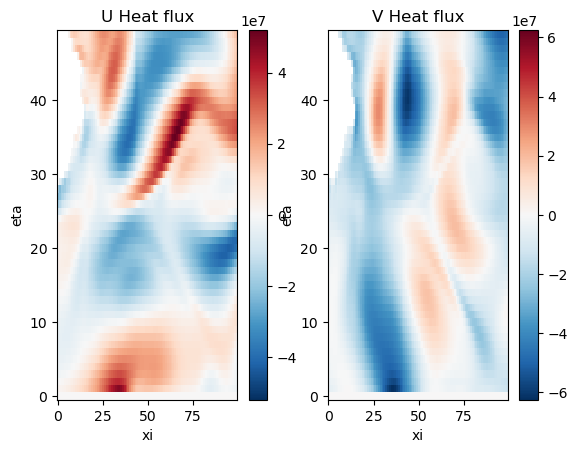

In [57]:
fig, ax = plt.subplots(ncols=2)
u_heat_trans.isel(s_rho=-1).plot(ax=ax[0]); ax[0].set_title('U Heat flux');
v_heat_trans.isel(s_rho=-1).plot(ax=ax[1]); ax[1].set_title('V Heat flux');

In [85]:
u_heat_trans

<xarray.DataArray (s_rho: 30, eta: 50, xi: 100)>
array([[[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 7.6306870e+03, -6.0837781e+04, -1.1812876e+05, ...,
         -3.4489334e+05, -3.4837144e+05, -3.6117253e+05],
        [-6.5520820e+04, -9.2160227e+04, -1.1348589e+05, ...,
         -3.0509819e+05, -3.1406231e+05, -3.2826319e+05],
        ...,
        [           nan,            nan,            nan, ...,
          1.6399581e+05,  2.0588341e+05,  2.4582717e+05],
        [           nan,            nan,            nan, ...,
          1.5377692e+05,  1.9569634e+05,  2.3700845e+05],
        [           nan,            nan,            nan, ...,
          9.8050320e+04,  1.2931047e+05,  1.6370781e+05]],

       [[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-2.6520504e+04, -5.3627980e+04, -6.7571352e+04, ...,
         -4.0246866e+05, -3.8702838e+05, -3.9664084e+05],
        [ 3.0640932e+04,  1.6838666e+04,  1.3654787e+04, ...,
         -4.0107091e+05, -3.9385266e+05, -3.9953619e+05],
...
        [           nan,            nan,            nan, ...,
          8.8894020e+06,  1.1446801e+07,  1.4143497e+07],
        [           nan,            nan,            nan, ...,
          9.6304840e+06,  1.2120106e+07,  1.4650907e+07],
        [           nan,            nan,            nan, ...,
          1.1803978e+07,  1.4205807e+07,  1.6547893e+07]],

       [[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 1.5887814e+06,  1.8032796e+06,  2.0233065e+06, ...,
         -1.7523624e+06, -2.2848145e+06, -2.9409870e+06],
        [-9.3627320e+04,  1.5337902e+05,  4.4851444e+05, ...,
         -5.5843625e+05, -1.2448856e+06, -1.9797236e+06],
        ...,
        [           nan,            nan,            nan, ...,
          8.9318250e+06,  1.1467571e+07,  1.4131148e+07],
        [           nan,            nan,            nan, ...,
          9.6756320e+06,  1.2149482e+07,  1.4654695e+07],
        [           nan,            nan,            nan, ...,
          1.1853434e+07,  1.4243401e+07,  1.6567327e+07]]], dtype=float32)
Coordinates:
  * s_rho       (s_rho) float64 -0.9715 -0.9156 -0.8614 ... -0.0156 -0.004799
    lon_rho     (eta, xi) float64 148.9 148.9 148.9 149.0 ... 152.5 152.6 152.6
    lat_rho     (eta, xi) float64 -39.01 -39.01 -39.02 ... -37.73 -37.74 -37.75
    ocean_time  datetime64[ns] 1994-02-01
Dimensions without coordinates: eta, xi

In [137]:

def extract_transp_across_contour(temp, var_x, var_y):   # var:4D [time,eta_rho,xi_rho]

    zlen = len(temp[:,0,0])
    tlen = 1
    # print(tlen,zlen)
    transp_across_contour = np.empty((tlen,zlen,len(contour_ordering)))

    for tt in range(0,tlen): # loop through time
        for zz in range(0,zlen): # loop through z-levels

            print('Debugging high memory usage: ')
            print('Time: %s, and Sigma level: %s' % (tt, zz))

            var_x_tmp = var_x.isel(s_rho=zz) * mask_x_transport_Ugrd
            var_y_tmp = var_y.isel(s_rho=zz) * mask_y_transport_Vgrd
            
            print('var_x_tmp/var_y_tmp shapes after mask multip.: %s, %s' % (var_x_tmp.shape, var_y_tmp.shape))
            # print(var_x_tmp.shape, var_y_tmp.shape)
            
            # stack transports into 1d and drop any points not on contour:
            fig, ax = plt.subplots(ncols=2)
            ax[0].pcolor(var_x_tmp)
            ax[1].pcolor(var_y_tmp)

            x_var_1d_tmp = var_x_tmp.stack(contour_index = ['eta', 'xi'])
            x_var_1d_tmp = x_var_1d_tmp.where(mask_x_numbered_1d>0, drop = True)
            y_var_1d_tmp = var_y_tmp.stack(contour_index = ['eta', 'xi'])
            y_var_1d_tmp = y_var_1d_tmp.where(mask_y_numbered_1d>0, drop = True)

            print('x_var_1d_tmp/y_var_1d_tmp shapes after stack: %s, %s' % (x_var_1d_tmp.shape, y_var_1d_tmp.shape))
            # print(x_var_1d_tmp.shape, y_var_1d_tmp.shape)

            # combine all points on contour:
            transp_across_contour_tmp = xr.concat((x_var_1d_tmp, y_var_1d_tmp), dim = 'contour_index')
            transp_across_contour_tmp = transp_across_contour_tmp.reset_index('contour_index') # added by fabio, otherwise it crashes due to duplicated indices
            transp_across_contour_tmp = transp_across_contour_tmp.sortby(contour_ordering)
            transp_across_contour_tmp.coords['contour_index'] = contour_index_array
            transp_across_contour_tmp = transp_across_contour_tmp.load()

            # print(tt, zz, transp_across_contour_tmp.shape)
            transp_across_contour[tt,zz,:] = transp_across_contour_tmp
            del transp_across_contour_tmp

    return transp_across_contour.squeeze()  # getting rid of unit dimention

Debugging high memory usage: 
Time: 0, and Sigma level: 0
var_x_tmp/var_y_tmp shapes after mask multip.: (50, 100), (50, 100)
x_var_1d_tmp/y_var_1d_tmp shapes after stack: (33,), (33,)
Debugging high memory usage: 
Time: 0, and Sigma level: 1
var_x_tmp/var_y_tmp shapes after mask multip.: (50, 100), (50, 100)
x_var_1d_tmp/y_var_1d_tmp shapes after stack: (33,), (33,)
Debugging high memory usage: 
Time: 0, and Sigma level: 2
var_x_tmp/var_y_tmp shapes after mask multip.: (50, 100), (50, 100)
x_var_1d_tmp/y_var_1d_tmp shapes after stack: (33,), (33,)
Debugging high memory usage: 
Time: 0, and Sigma level: 3
var_x_tmp/var_y_tmp shapes after mask multip.: (50, 100), (50, 100)


/home/fsobral/miniforge3/envs/XROMS/lib/python3.8/site-packages/xarray/core/coordinates.py:46: FutureWarning: Updating MultiIndexed coordinate 'contour_index' would corrupt indices for other variables: ['eta', 'xi']. This will raise an error in the future. Use `.drop_vars({'xi', 'eta', 'contour_index'})` before assigning new coordinate values.
  self.update({key: value})
/home/fsobral/miniforge3/envs/XROMS/lib/python3.8/site-packages/xarray/core/coordinates.py:46: FutureWarning: Updating MultiIndexed coordinate 'contour_index' would corrupt indices for other variables: ['eta', 'xi']. This will raise an error in the future. Use `.drop_vars({'xi', 'eta', 'contour_index'})` before assigning new coordinate values.
  self.update({key: value})
/home/fsobral/miniforge3/envs/XROMS/lib/python3.8/site-packages/xarray/core/coordinates.py:46: FutureWarning: Updating MultiIndexed coordinate 'contour_index' would corrupt indices for other variables: ['eta', 'xi']. This will raise an error in the fut

x_var_1d_tmp/y_var_1d_tmp shapes after stack: (33,), (33,)
Debugging high memory usage: 
Time: 0, and Sigma level: 4
var_x_tmp/var_y_tmp shapes after mask multip.: (50, 100), (50, 100)
x_var_1d_tmp/y_var_1d_tmp shapes after stack: (33,), (33,)
Debugging high memory usage: 
Time: 0, and Sigma level: 5
var_x_tmp/var_y_tmp shapes after mask multip.: (50, 100), (50, 100)
x_var_1d_tmp/y_var_1d_tmp shapes after stack: (33,), (33,)
Debugging high memory usage: 
Time: 0, and Sigma level: 6
var_x_tmp/var_y_tmp shapes after mask multip.: (50, 100), (50, 100)
x_var_1d_tmp/y_var_1d_tmp shapes after stack: (33,), (33,)
Debugging high memory usage: 
Time: 0, and Sigma level: 7
var_x_tmp/var_y_tmp shapes after mask multip.: (50, 100), (50, 100)


/home/fsobral/miniforge3/envs/XROMS/lib/python3.8/site-packages/xarray/core/coordinates.py:46: FutureWarning: Updating MultiIndexed coordinate 'contour_index' would corrupt indices for other variables: ['eta', 'xi']. This will raise an error in the future. Use `.drop_vars({'xi', 'eta', 'contour_index'})` before assigning new coordinate values.
  self.update({key: value})
/home/fsobral/miniforge3/envs/XROMS/lib/python3.8/site-packages/xarray/core/coordinates.py:46: FutureWarning: Updating MultiIndexed coordinate 'contour_index' would corrupt indices for other variables: ['eta', 'xi']. This will raise an error in the future. Use `.drop_vars({'xi', 'eta', 'contour_index'})` before assigning new coordinate values.
  self.update({key: value})
/home/fsobral/miniforge3/envs/XROMS/lib/python3.8/site-packages/xarray/core/coordinates.py:46: FutureWarning: Updating MultiIndexed coordinate 'contour_index' would corrupt indices for other variables: ['eta', 'xi']. This will raise an error in the fut

x_var_1d_tmp/y_var_1d_tmp shapes after stack: (33,), (33,)
Debugging high memory usage: 
Time: 0, and Sigma level: 8
var_x_tmp/var_y_tmp shapes after mask multip.: (50, 100), (50, 100)
x_var_1d_tmp/y_var_1d_tmp shapes after stack: (33,), (33,)
Debugging high memory usage: 
Time: 0, and Sigma level: 9
var_x_tmp/var_y_tmp shapes after mask multip.: (50, 100), (50, 100)
x_var_1d_tmp/y_var_1d_tmp shapes after stack: (33,), (33,)
Debugging high memory usage: 
Time: 0, and Sigma level: 10
var_x_tmp/var_y_tmp shapes after mask multip.: (50, 100), (50, 100)
x_var_1d_tmp/y_var_1d_tmp shapes after stack: (33,), (33,)
Debugging high memory usage: 
Time: 0, and Sigma level: 11
var_x_tmp/var_y_tmp shapes after mask multip.: (50, 100), (50, 100)


/home/fsobral/miniforge3/envs/XROMS/lib/python3.8/site-packages/xarray/core/coordinates.py:46: FutureWarning: Updating MultiIndexed coordinate 'contour_index' would corrupt indices for other variables: ['eta', 'xi']. This will raise an error in the future. Use `.drop_vars({'xi', 'eta', 'contour_index'})` before assigning new coordinate values.
  self.update({key: value})
/home/fsobral/miniforge3/envs/XROMS/lib/python3.8/site-packages/xarray/core/coordinates.py:46: FutureWarning: Updating MultiIndexed coordinate 'contour_index' would corrupt indices for other variables: ['eta', 'xi']. This will raise an error in the future. Use `.drop_vars({'xi', 'eta', 'contour_index'})` before assigning new coordinate values.
  self.update({key: value})
/home/fsobral/miniforge3/envs/XROMS/lib/python3.8/site-packages/xarray/core/coordinates.py:46: FutureWarning: Updating MultiIndexed coordinate 'contour_index' would corrupt indices for other variables: ['eta', 'xi']. This will raise an error in the fut

x_var_1d_tmp/y_var_1d_tmp shapes after stack: (33,), (33,)
Debugging high memory usage: 
Time: 0, and Sigma level: 12
var_x_tmp/var_y_tmp shapes after mask multip.: (50, 100), (50, 100)
x_var_1d_tmp/y_var_1d_tmp shapes after stack: (33,), (33,)
Debugging high memory usage: 
Time: 0, and Sigma level: 13
var_x_tmp/var_y_tmp shapes after mask multip.: (50, 100), (50, 100)
x_var_1d_tmp/y_var_1d_tmp shapes after stack: (33,), (33,)
Debugging high memory usage: 
Time: 0, and Sigma level: 14
var_x_tmp/var_y_tmp shapes after mask multip.: (50, 100), (50, 100)
x_var_1d_tmp/y_var_1d_tmp shapes after stack: (33,), (33,)
Debugging high memory usage: 
Time: 0, and Sigma level: 15
var_x_tmp/var_y_tmp shapes after mask multip.: (50, 100), (50, 100)
x_var_1d_tmp/y_var_1d_tmp shapes after stack: (33,), (33,)
Debugging high memory usage: 
Time: 0, and Sigma level: 16
var_x_tmp/var_y_tmp shapes after mask multip.: (50, 100), (50, 100)


/home/fsobral/miniforge3/envs/XROMS/lib/python3.8/site-packages/xarray/core/coordinates.py:46: FutureWarning: Updating MultiIndexed coordinate 'contour_index' would corrupt indices for other variables: ['eta', 'xi']. This will raise an error in the future. Use `.drop_vars({'xi', 'eta', 'contour_index'})` before assigning new coordinate values.
  self.update({key: value})
/home/fsobral/miniforge3/envs/XROMS/lib/python3.8/site-packages/xarray/core/coordinates.py:46: FutureWarning: Updating MultiIndexed coordinate 'contour_index' would corrupt indices for other variables: ['eta', 'xi']. This will raise an error in the future. Use `.drop_vars({'xi', 'eta', 'contour_index'})` before assigning new coordinate values.
  self.update({key: value})
/home/fsobral/miniforge3/envs/XROMS/lib/python3.8/site-packages/xarray/core/coordinates.py:46: FutureWarning: Updating MultiIndexed coordinate 'contour_index' would corrupt indices for other variables: ['eta', 'xi']. This will raise an error in the fut

x_var_1d_tmp/y_var_1d_tmp shapes after stack: (33,), (33,)
Debugging high memory usage: 
Time: 0, and Sigma level: 17
var_x_tmp/var_y_tmp shapes after mask multip.: (50, 100), (50, 100)
x_var_1d_tmp/y_var_1d_tmp shapes after stack: (33,), (33,)
Debugging high memory usage: 
Time: 0, and Sigma level: 18
var_x_tmp/var_y_tmp shapes after mask multip.: (50, 100), (50, 100)
x_var_1d_tmp/y_var_1d_tmp shapes after stack: (33,), (33,)
Debugging high memory usage: 
Time: 0, and Sigma level: 19
var_x_tmp/var_y_tmp shapes after mask multip.: (50, 100), (50, 100)
x_var_1d_tmp/y_var_1d_tmp shapes after stack: (33,), (33,)
Debugging high memory usage: 
Time: 0, and Sigma level: 20
var_x_tmp/var_y_tmp shapes after mask multip.: (50, 100), (50, 100)


/home/fsobral/miniforge3/envs/XROMS/lib/python3.8/site-packages/xarray/core/coordinates.py:46: FutureWarning: Updating MultiIndexed coordinate 'contour_index' would corrupt indices for other variables: ['eta', 'xi']. This will raise an error in the future. Use `.drop_vars({'xi', 'eta', 'contour_index'})` before assigning new coordinate values.
  self.update({key: value})
/home/fsobral/miniforge3/envs/XROMS/lib/python3.8/site-packages/xarray/core/coordinates.py:46: FutureWarning: Updating MultiIndexed coordinate 'contour_index' would corrupt indices for other variables: ['eta', 'xi']. This will raise an error in the future. Use `.drop_vars({'xi', 'eta', 'contour_index'})` before assigning new coordinate values.
  self.update({key: value})
/home/fsobral/miniforge3/envs/XROMS/lib/python3.8/site-packages/xarray/core/coordinates.py:46: FutureWarning: Updating MultiIndexed coordinate 'contour_index' would corrupt indices for other variables: ['eta', 'xi']. This will raise an error in the fut

x_var_1d_tmp/y_var_1d_tmp shapes after stack: (33,), (33,)
Debugging high memory usage: 
Time: 0, and Sigma level: 21
var_x_tmp/var_y_tmp shapes after mask multip.: (50, 100), (50, 100)
x_var_1d_tmp/y_var_1d_tmp shapes after stack: (33,), (33,)
Debugging high memory usage: 
Time: 0, and Sigma level: 22
var_x_tmp/var_y_tmp shapes after mask multip.: (50, 100), (50, 100)
x_var_1d_tmp/y_var_1d_tmp shapes after stack: (33,), (33,)
Debugging high memory usage: 
Time: 0, and Sigma level: 23
var_x_tmp/var_y_tmp shapes after mask multip.: (50, 100), (50, 100)
x_var_1d_tmp/y_var_1d_tmp shapes after stack: (33,), (33,)
Debugging high memory usage: 
Time: 0, and Sigma level: 24
var_x_tmp/var_y_tmp shapes after mask multip.: (50, 100), (50, 100)


/home/fsobral/miniforge3/envs/XROMS/lib/python3.8/site-packages/xarray/core/coordinates.py:46: FutureWarning: Updating MultiIndexed coordinate 'contour_index' would corrupt indices for other variables: ['eta', 'xi']. This will raise an error in the future. Use `.drop_vars({'xi', 'eta', 'contour_index'})` before assigning new coordinate values.
  self.update({key: value})
/home/fsobral/miniforge3/envs/XROMS/lib/python3.8/site-packages/xarray/core/coordinates.py:46: FutureWarning: Updating MultiIndexed coordinate 'contour_index' would corrupt indices for other variables: ['eta', 'xi']. This will raise an error in the future. Use `.drop_vars({'xi', 'eta', 'contour_index'})` before assigning new coordinate values.
  self.update({key: value})
/home/fsobral/miniforge3/envs/XROMS/lib/python3.8/site-packages/xarray/core/coordinates.py:46: FutureWarning: Updating MultiIndexed coordinate 'contour_index' would corrupt indices for other variables: ['eta', 'xi']. This will raise an error in the fut

x_var_1d_tmp/y_var_1d_tmp shapes after stack: (33,), (33,)
Debugging high memory usage: 
Time: 0, and Sigma level: 25
var_x_tmp/var_y_tmp shapes after mask multip.: (50, 100), (50, 100)
x_var_1d_tmp/y_var_1d_tmp shapes after stack: (33,), (33,)
Debugging high memory usage: 
Time: 0, and Sigma level: 26
var_x_tmp/var_y_tmp shapes after mask multip.: (50, 100), (50, 100)
x_var_1d_tmp/y_var_1d_tmp shapes after stack: (33,), (33,)
Debugging high memory usage: 
Time: 0, and Sigma level: 27
var_x_tmp/var_y_tmp shapes after mask multip.: (50, 100), (50, 100)
x_var_1d_tmp/y_var_1d_tmp shapes after stack: (33,), (33,)
Debugging high memory usage: 
Time: 0, and Sigma level: 28
var_x_tmp/var_y_tmp shapes after mask multip.: (50, 100), (50, 100)


/home/fsobral/miniforge3/envs/XROMS/lib/python3.8/site-packages/xarray/core/coordinates.py:46: FutureWarning: Updating MultiIndexed coordinate 'contour_index' would corrupt indices for other variables: ['eta', 'xi']. This will raise an error in the future. Use `.drop_vars({'xi', 'eta', 'contour_index'})` before assigning new coordinate values.
  self.update({key: value})
/home/fsobral/miniforge3/envs/XROMS/lib/python3.8/site-packages/xarray/core/coordinates.py:46: FutureWarning: Updating MultiIndexed coordinate 'contour_index' would corrupt indices for other variables: ['eta', 'xi']. This will raise an error in the future. Use `.drop_vars({'xi', 'eta', 'contour_index'})` before assigning new coordinate values.
  self.update({key: value})
/home/fsobral/miniforge3/envs/XROMS/lib/python3.8/site-packages/xarray/core/coordinates.py:46: FutureWarning: Updating MultiIndexed coordinate 'contour_index' would corrupt indices for other variables: ['eta', 'xi']. This will raise an error in the fut

x_var_1d_tmp/y_var_1d_tmp shapes after stack: (33,), (33,)
Debugging high memory usage: 
Time: 0, and Sigma level: 29
var_x_tmp/var_y_tmp shapes after mask multip.: (50, 100), (50, 100)
x_var_1d_tmp/y_var_1d_tmp shapes after stack: (33,), (33,)


/home/fsobral/miniforge3/envs/XROMS/lib/python3.8/site-packages/xarray/core/coordinates.py:46: FutureWarning: Updating MultiIndexed coordinate 'contour_index' would corrupt indices for other variables: ['eta', 'xi']. This will raise an error in the future. Use `.drop_vars({'xi', 'eta', 'contour_index'})` before assigning new coordinate values.
  self.update({key: value})
/home/fsobral/miniforge3/envs/XROMS/lib/python3.8/site-packages/xarray/core/coordinates.py:46: FutureWarning: Updating MultiIndexed coordinate 'contour_index' would corrupt indices for other variables: ['eta', 'xi']. This will raise an error in the future. Use `.drop_vars({'xi', 'eta', 'contour_index'})` before assigning new coordinate values.
  self.update({key: value})


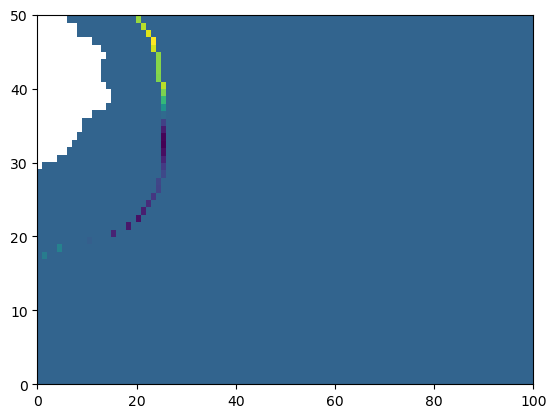

In [138]:
transp_across_contour = extract_transp_across_contour(temp, u_heat_trans, v_heat_trans)

In [ ]:
# plt.pcolormesh(transp_across_contour.squeeze())
# plt.colorbar()

In [75]:
np.shape(transp_across_contour)

(30, 66)